# Building a CNN from Scratch - Lab

## Introduction

Now that you have background knowledge regarding how CNNs work and how to implement them via Keras, its time to practice those skills a little more independently in order to build a CNN on your own to solve a image recognition problem. In this lab, you'll practice building an image classifier from start to finish using a CNN.  

## Objectives

You will be able to:
* Transform images into tensors
* Build a CNN model for image recognition

## Loading the Images

The data for this lab concerns classifying lung xray images for pneumonia. The original dataset is from kaggle. We have downsampled this dataset in order to reduce training time for you when you design and fit your model to the data. ⏰ It is anticipated that this process will take approximately 1 hour to run on a standard machine, although times will vary depending on your particular computer and set up. At the end of this lab, you are welcome to try training on the complete dataset and observe the impact on the model's overall accuracy. 

You can find the initial downsampled dataset in a subdirectory, **chest_xray**, of this repository.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

Using TensorFlow backend.


In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\FlatironSchool\Module06\Section_47\dsc-building-a-cnn-from-scratch-online-ds-pt-051319

20/01/2020  16:32    <DIR>          .
20/01/2020  16:32    <DIR>          ..
20/01/2020  16:23                69 .gitignore
20/01/2020  16:32    <DIR>          .ipynb_checkpoints
20/01/2020  16:23                96 .learn
20/01/2020  16:23        27,665,728 chest_xray_all_data.h5
20/01/2020  16:23        27,665,728 chest_xray_all_with_augmentation_data.h5
20/01/2020  16:23    <DIR>          chest_xray_downsampled
20/01/2020  16:23        27,665,728 chest_xray_downsampled_data.h5
20/01/2020  16:23        27,665,728 chest_xray_downsampled_with_augmentation_data.h5
20/01/2020  16:23             1,849 CONTRIBUTING.md
20/01/2020  16:32             9,070 index.ipynb
20/01/2020  16:23    <DIR>          index_files
20/01/2020  16:23             1,371 LICENSE.md
20/01/2020  16:23             4,681 README.md
            

## Designing the Model

Now it's time to design your CNN! Remember a few things when doing this: 
* You should alternate convolutional and pooling layers
* You should have later layers have a larger number of parameters in order to detect more abstract patterns
* Add some final dense layers to add a classifier to the convolutional base

In [3]:
train_dir = 'chest_xray_downsampled/train'
validation_dir = 'chest_xray_downsampled/val/'
test_dir = 'chest_xray_downsampled/test/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1738 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


## Training and Evaluating the Model

Remember that training deep networks is resource intensive: depending on the size of the data, even a CNN with 3-4 successive convolutional and pooling layers is apt to take a hours to train on a high end laptop. Using 30 epochs and 8 layers (alternating between convolutional and pooling), our model took about 40 minutes to run on a year old macbook pro.


If you are concerned with runtime, you may want to set your model to run the training epochs overnight.  

**If you are going to run this process overnight, be sure to also script code for the following questions concerning data augmentation. Check your code twice (or more) and then set the notebook to run all, or something equivalent to have them train overnight.**

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [5]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 57s 570ms/step - loss: 0.5128 - acc: 0.7589 - val_loss: 1.0069 - val_acc: 0.7500
Epoch 2/30
100/100 [==============================] - 52s 515ms/step - loss: 0.2847 - acc: 0.8830 - val_loss: 1.3261 - val_acc: 0.7500
Epoch 3/30
100/100 [==============================] - 53s 528ms/step - loss: 0.1925 - acc: 0.9249 - val_loss: 1.7350 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 57s 569ms/step - loss: 0.1463 - acc: 0.9388 - val_loss: 1.1781 - val_acc: 0.7500
Epoch 5/30
100/100 [==============================] - 53s 526ms/step - loss: 0.1215 - acc: 0.9510 - val_loss: 1.6845 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 52s 522ms/step - loss: 0.1121 - acc: 0.9504 - val_loss: 1.1591 - val_acc: 0.7500
Epoch 7/30
100/100 [==============================] - 56s 557ms/step - loss: 0.1030 - acc: 0.9555 - val_loss: 1.8187 - val_acc: 0.5000
Epoch 8/30
100/100 [==============================] - 5

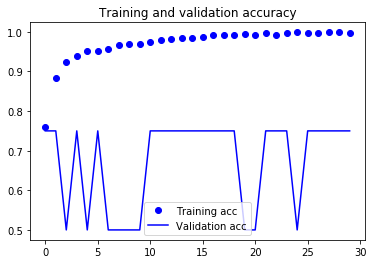

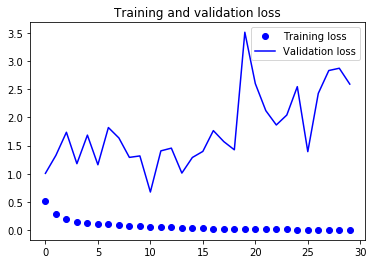

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [7]:
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Training took a total of 0:28:43.035337


## Save the Model

In [8]:
model.save('chest_xray_downsampled_data.h5')

## Final Evaluation

Now use the test set to perform a final evaluation on your model of choice.

In [9]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 208 images belonging to 2 classes.
test acc: 0.7909663908120965


## Summary

Well done! In this lab, you practice building your own CNN for image recognition which drastically outperformed our previous attempts using a standard deep learning model alone. In the upcoming sections, we'll continue to investigate further techniques associated with CNNs including visualizing the representations they learn and techniques to further bolster their performance when we have limited training data such as here.